In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nd = 1000#Número de partículas(datos)
Nr = Nd#Número de aleatoris
Rep = 5#Número de repeticiones
dRtot = Rep*(Nr*(Nr-1.)/2.)#Número de distancias totales de los aleatorios
dDtot = Nd*(Nd-1.)/2.#Número de distancias totales de los datos
Nest = dRtot/dDtot#Para normalizar
L = 100#Longitud de la caja

In [3]:
aleatx = []#listas donde se guardarán las coordenadas aleatorias de x
aleaty = []#listas donde se guardarán las coordenadas aleatorias de y

In [4]:
for i in range(Rep):#Genera el número de repeticiones de los aleatorios
    ran_x = L*np.random.uniform(0.,1.,Nr)#Genera Nr números aleatorios
    ran_y = L*np.random.uniform(0.,1.,Nr)
    aleatx.append(ran_x)#Guarda a los aleatorios en la lista para x
    aleaty.append(ran_y)

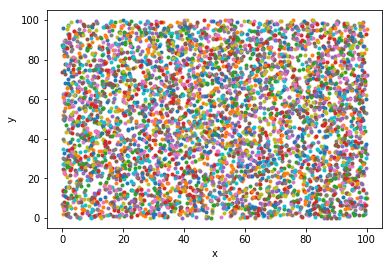

In [5]:
#Gráfica de los aleatorios donde cada color representa cada repetición
plt.plot(aleatx,aleaty,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

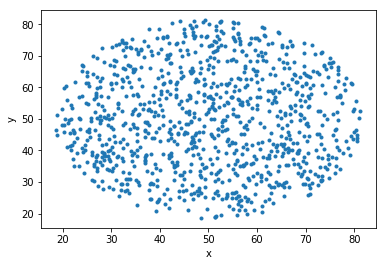

In [6]:
#Genera los datos que forman el disco
theta = np.random.random(Nd)*2.*np.pi
r1 = np.random.uniform(0.0,1000.,Nd)
r = np.sqrt(r1)#**(0.5)
x = r*np.cos(theta) + 50.
y = r*np.sin(theta) + 50.
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

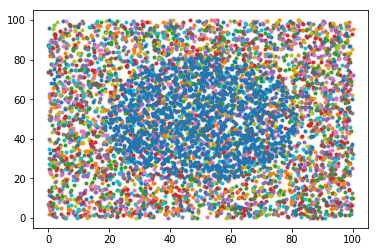

In [7]:
plt.plot(aleatx,aleaty,'.')
plt.plot(x,y,'.')
plt.show()

In [8]:
print len(x)#Tamaño de los datos
print len(ran_x)#Tamaño de los aleatorios

1000
1000


In [9]:
#Función que calcula las distancias en 2D
def distancia(x1,x2,y1,y2):
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d

In [10]:
dis_data = []#Lista donde se guardarán las distancias entre los datos DD
dis_ran = []#Lista donde se guardarán las distancias entre los aleatorios RR

In [11]:
#Generamos los bins para que queden fijos de 0 a L*sqrt(2)(tamaño máximo de la cada) y el número de bins que queremos(20)
nbin = np.linspace(0.,np.sqrt(2.)*L,20)
print nbin

[  0.           7.44322928  14.88645855  22.32968783  29.7729171
  37.21614638  44.65937565  52.10260493  59.54583421  66.98906348
  74.43229276  81.87552203  89.31875131  96.76198058 104.20520986
 111.64843913 119.09166841 126.53489769 133.97812696 141.42135624]


In [12]:
#Calcula las distancias entre cada una de las coordenadas de los datos sin repetirse y las guarda en dis_data
for i in range(len(x)):
    for j in range(i+1,len(x)):
        d_d = distancia(x[i],x[j],y[i],y[j])
        dis_data.append(d_d)

In [13]:
#Calcula las distancias entre las coordenadas de los datos sin repetirse, tomando las repeticiones con len(aleatx)
for l in range(len(aleatx)):
    for i in range(len(ran_x)):
        for j in range(i+1,len(ran_x)):
            d_r = distancia(ran_x[i],ran_x[j],ran_y[i],ran_y[j])
            dis_ran.append(d_r)

Histograma de las distancias entre los datos $DD$

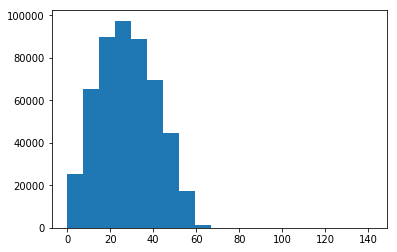

In [14]:
#La función hist nos regresa los valores de los bins del histograma = data_n
#los bins +1 = data_bin
data_n, data_bin,m = plt.hist(dis_data,bins=nbin)

Histograma de las distancias entre los aleatorios $RR$

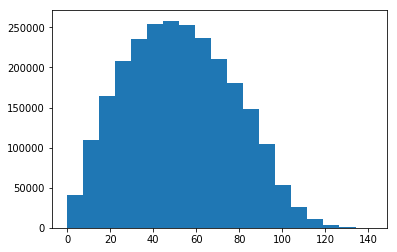

In [15]:
ran_n, ran_bin, p = plt.hist(dis_ran,bins=nbin)

Función de Correlación de Peebles $\frac{1}{N_{est}^{2}}\frac{DD(r)}{RR(r)} - 1$ 

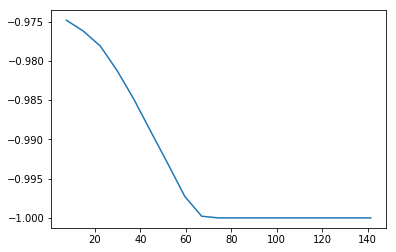

In [16]:
plt.plot(data_bin[1:],((1/Nest)**2)*(data_n/ran_n) -1)

Para la función de correlación de Hamilton $\psi_{H}^{2} = \frac{DD(r)RR(r)}{(DR(r))^{2}}$

In [17]:
dis_dr = []#Lista donde se guardarán las distancias entre los datos y los aleatorios

In [18]:
#Calcula las distancias entre todos los aletorios con todos los datos
for l in range(len(aleatx)):#ciclo para las repeticiones
    for i in range(len(x)):
        for j in range(len(ran_x)):
            d_dr = distancia(x[i],ran_x[j],y[i],ran_y[j])
            dis_dr.append(d_dr)

Histograma de las distancias entre datos y aleatorios $DR$

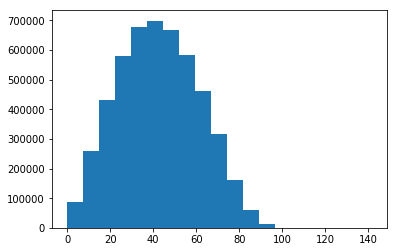

In [19]:
dr_n, dr_bin, q = plt.hist(dis_dr,bins=nbin)

Función de correlación de Hamilton

/home/atarockz/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


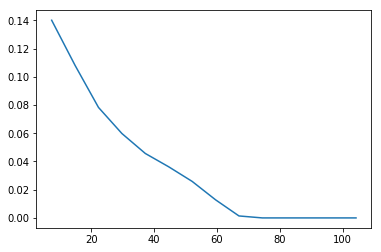

In [20]:
plt.plot(data_bin[1:],(data_n*ran_n)/(dr_n)**2)
plt.show()

Para la función de correlación de Landy-Szalay $1 +\frac{1}{N_{est}^{2}} \frac{DD(r)}{RR(r)} -2\frac{1}{N_{est}}\frac{DR(r)}{RR(r)} $

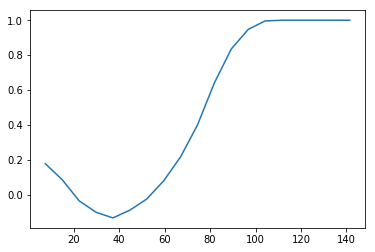

In [21]:
plt.plot(data_bin[1:],1.+ ((1/Nest)**2)*(data_n/ran_n) -2.*(1/Nest)*dr_n/ran_n)